3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/sem3ai/bank .csv")

#columns with dtypes:object

object_columns = dataset.select_dtypes(include=['object']).columns
print("columns with dtypes:object:\n")
print(object_columns)

#unique values of those columns

unique_values = dataset[object_columns].nunique()
print("\nunique values of those columns:\n")
print(unique_values)

#nyll values in each column

print("null values:\n")
print(dataset.isnull().sum())
print("null values:\n")
print(dataset.isnull().sum())

#drop columns with dtype objects

numeric_data = dataset.drop(columns=object_columns)
print("\nNew DataFrame after dropping object columns:")
print(numeric_data.head())

#Write new DataFrame to a CSV file

numeric_data.to_csv('banknumericdata.csv', index=False)

#Read new CSV and find summary statistics

numeric_data_reloaded = pd.read_csv('banknumericdata.csv')
print("\nSummary statistics of the numeric DataFrame:")
print(numeric_data_reloaded.describe())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
columns with dtypes:object:

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

unique values of those columns:

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64
null values:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
null values:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays    

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/MyDrive/sem3ai/medical_students_dataset .csv"
medical_df = pd.read_csv(file_path)

# Check info of the DataFrame and identify columns with missing (null) values
missing_values = medical_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing_values)

# Impute missing values for the identified columns
for column in columns_with_missing_values.index:
    if medical_df[column].dtype == 'object':
        # For categorical columns, use mode (most frequent value)
        mode_value = medical_df[column].mode()[0]
        medical_df[column] = medical_df[column].fillna(mode_value)
        print(f"Filled missing values in column '{column}' with mode: {mode_value}")
    else:
        # For numerical columns, use mean
        mean_value = medical_df[column].mean()
        medical_df[column] = medical_df[column].fillna(mean_value)
        print(f"Filled missing values in column '{column}' with mean: {mean_value}")
"""
using mode for categorical columns(objects):mode means the most frequent data and it would be a reasonable assumption to replace mode for missing datas
using mean for continuous numberic data:for we can replace the missing values with the average value of the column, i.e. outliers are not created and unreasonable values if picked randomly
"""
print("using mode for categorical columns(objects):mode means the most frequent data and\n it would be a reasonable assumption to replace mode for missing datas \nusing mean for continuous numberic data:for we can replace the missing values with the average value\n of the column, i.e. outliers are not created and unreasonable values if picked randomly")
# Check for duplicate values and handle them
duplicates_count = medical_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

if duplicates_count > 0:
    # Drop duplicate rows
    medical_df.drop_duplicates(inplace=True)
    print(f"{duplicates_count} duplicate rows removed.")

# Optional: Check that there are no missing values after imputation
missing_values_after_imputation = medical_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

# Save the cleaned dataset to a new file (optional)
cleaned_file_path = "cleaned_medical_student.csv"
medical_df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled missing values in column 'Student ID' with mean: 49974.042077777776
Filled missing values in column 'Age' with mean: 26.02156111111111
Filled missing values in column 'Gender' with mode: Male
Filled missing values in column 'Height' with mean: 174.9471026685741
Filled missing values in column 'Weight' with mean: 69.97158509186075
Filled missing values in column 'Blood Type' with mode: B
Filled missing values in column 'BMI' with mean: 23.338869359639226
Filled missing values in column 'Temperature' with m

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#Load dataset
file_path = "/content/drive/MyDrive/sem3ai/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Subsetted DataFrame for given columns
columns_to_keep = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
subset_df = df[columns_to_keep]

# Filter rows where 'Pclass' is 1
first_class_df = subset_df[subset_df['Pclass'] == 1]
print(first_class_df)

# mean median max min for 'Fare' column
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

# Display the results
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female 

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.


In [ ]:
# Check for null values in the 'Age' column
null_values_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_values_count}")

# Drop rows with null values in the 'Age' column
cleaned_df = first_class_df.dropna(subset=['Age'])
print("\nsuccessfully dropped rows with null age values\n")

# Display the updated DataFrame
print(cleaned_df)


Number of null values in the 'Age' column: 30

successfully dropped rows with null age values

                                                  Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                      

Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
# Distribution of values in the 'Embarked' column
embarked_distribution = df['Embarked'].value_counts()
print("Embarked distribution:\n", embarked_distribution)

#One-hot encode the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
print("successfully converted embarked col to sep binary cols")

#Add the new columns to the DataFrame
titanic_df = pd.concat([df, embarked_dummies], axis=1)
print("successfully concatenated")

#Drop the original 'Embarked' column
titanic_df = titanic_df.drop('Embarked', axis=1)
print("successfully dropped")

#Print the first few rows
print(titanic_df.head())

Embarked distribution:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
successfully converted embarked col to sep binary cols
successfully concatenated
successfully dropped
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       Fals

Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


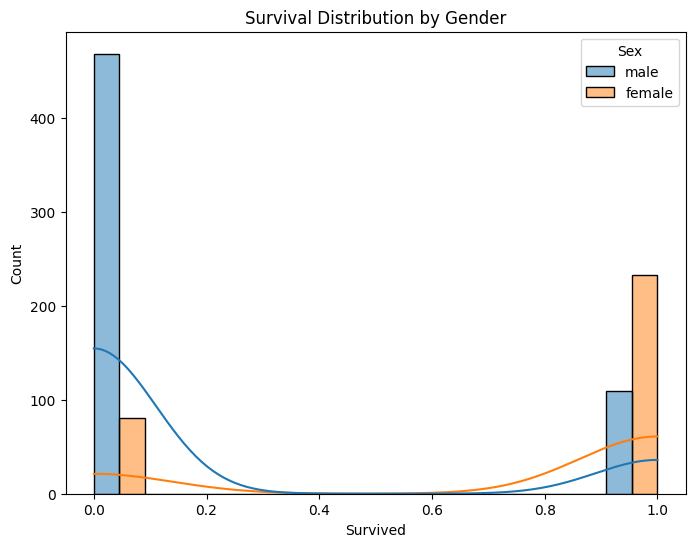

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#mean survival rates by gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:\n", mean_survival_by_gender)

#Visualization
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Survived', hue='Sex', kde=True, multiple="dodge")
plt.title('Survival Distribution by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

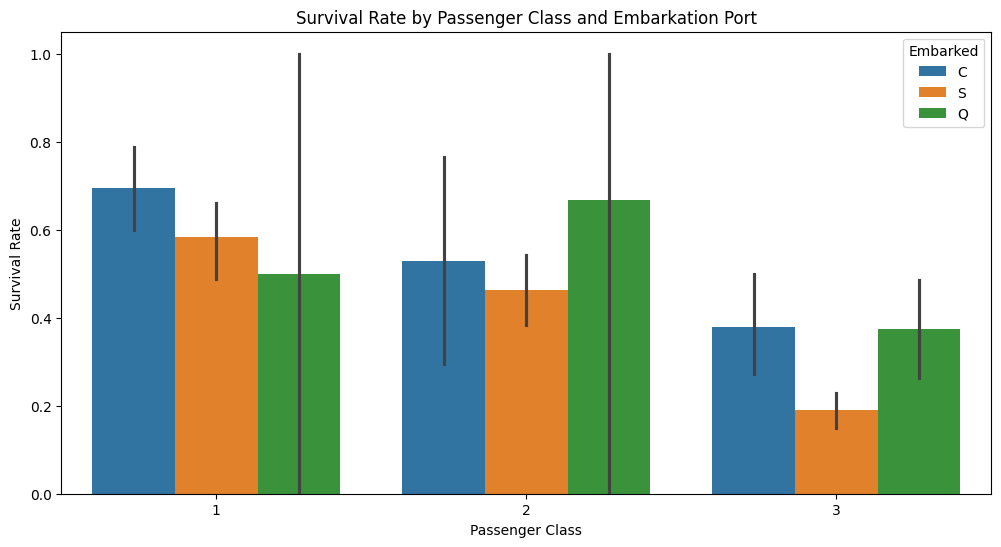

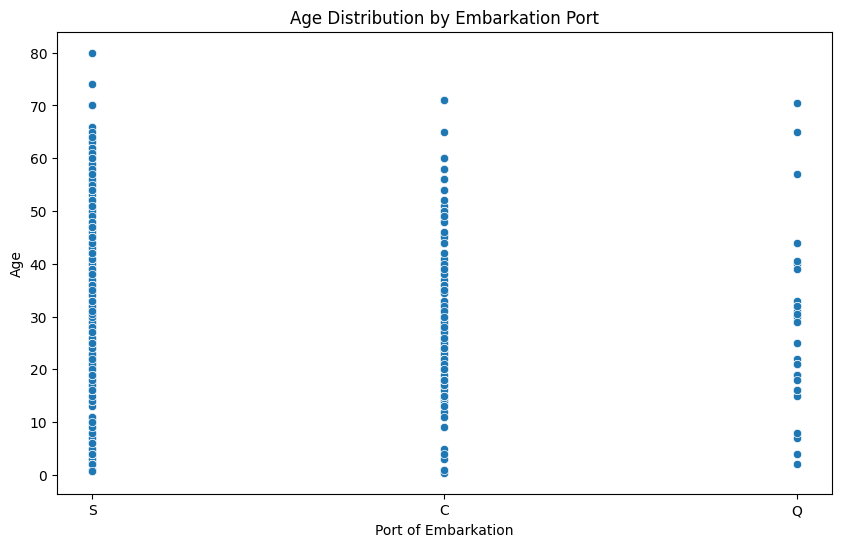

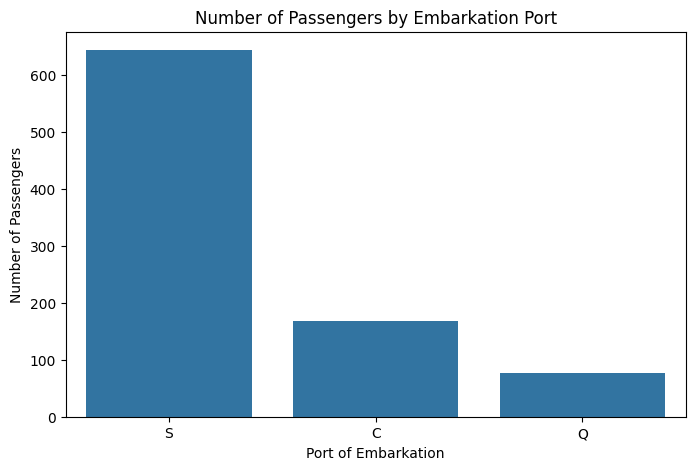

In [ ]:
# Create the visualization, breaking it down by port of embarkation
plt.figure(figsize=(12, 6))

sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Passenger Class and Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
print("\n")

# Alternative visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Embarked', y='Age', data=df)
plt.title('Age Distribution by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Age')
plt.show()
print("\n")

# Another visualization option
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


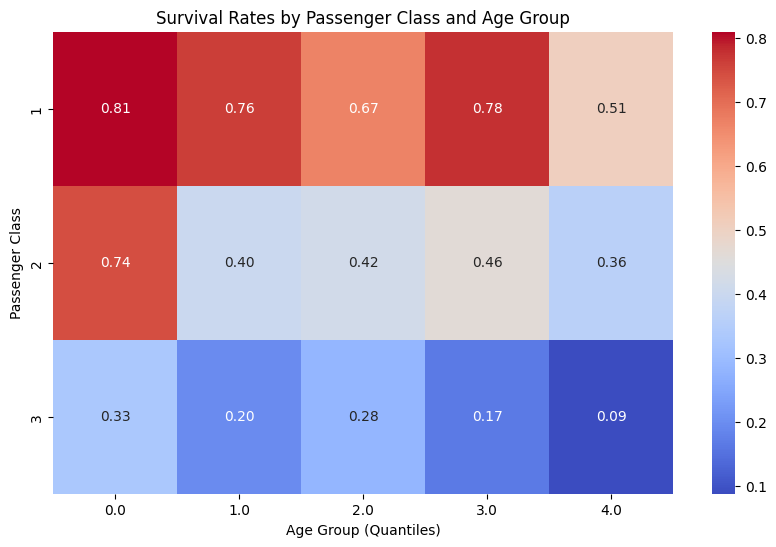

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Load dataset
file_path = "/content/drive/MyDrive/sem3ai/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Cut the 'Age' column into five quantiles
df['Age_Group'] = pd.qcut(df['Age'], 5, labels=False)

# Group by 'Pclass' and 'Age_Group' and calculate the mean survival rate
survival_rates = df.groupby(['Pclass', 'Age_Group'])['Survived'].mean().unstack()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Survival Rates by Passenger Class and Age Group')
plt.xlabel('Age Group (Quantiles)')
plt.ylabel('Passenger Class')
plt.show()